### The I-94 Traffic Dataset

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
metro.head()
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [35]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


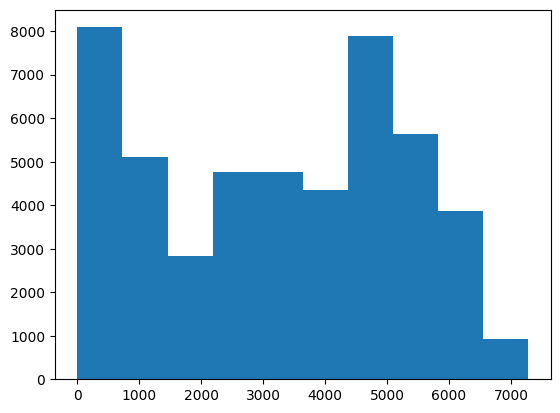

In [36]:
plt.hist(metro['traffic_volume'])
plt.show()


In [37]:
metro['traffic_volume'].describe()


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

we analyzed the distribution of traffic_volume and found the following:

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 75% of the time, the traffic volume was 4,933 cars or fewer. The remaining 25% of the time, the traffic volume exceeded 4,933 cars. This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.
We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [46]:
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro['hour'] = metro['date_time'].dt.hour

day = metro.copy()[(metro['hour'] >= 6) & (metro['hour'] < 18)]
night = metro.copy()[(metro['hour'] < 6) | (metro['hour'] >= 18)]
print(day)
print(night)

      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0         NaN  288.28      0.0      0.0          40       Clouds   
1         NaN  289.36      0.0      0.0          75       Clouds   
2         NaN  289.58      0.0      0.0          90       Clouds   
3         NaN  290.13      0.0      0.0          90       Clouds   
4         NaN  291.14      0.0      0.0          75       Clouds   
...       ...     ...      ...      ...         ...          ...   
48193     NaN  283.48      0.0      0.0          90      Drizzle   
48194     NaN  283.84      0.0      0.0          75         Rain   
48195     NaN  283.84      0.0      0.0          75      Drizzle   
48196     NaN  284.38      0.0      0.0          75         Rain   
48197     NaN  284.79      0.0      0.0          75       Clouds   

           weather_description           date_time  traffic_volume  hour  
0             scattered clouds 2012-10-02 09:00:00            5545     9  
1                broken clouds 20

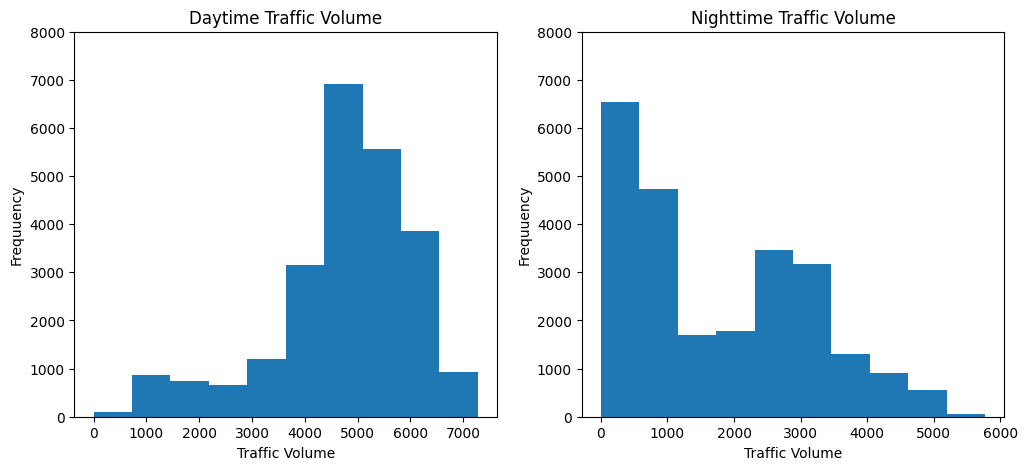

In [47]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequuency')
plt.ylim(0, 8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequuency')
plt.ylim(0, 8000)
plt.show()

In [48]:
day['traffic_volume'].describe()


count    23978.000000
mean      4749.223997
std       1314.402414
min          1.000000
25%       4269.000000
50%       4923.000000
75%       5660.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [49]:
night['traffic_volume'].describe()


count    24226.000000
mean      1785.659663
std       1332.692347
min          0.000000
25%        530.000000
50%       1414.000000
75%       2880.000000
max       5773.000000
Name: traffic_volume, dtype: float64

we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

    Month
    Day of the week
    Time of day

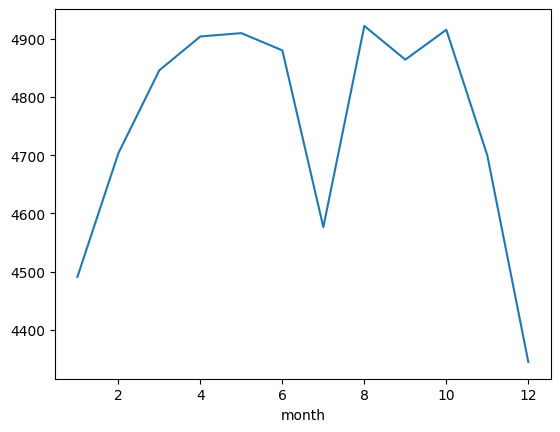

In [52]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume'].plot.line()
plt.show()

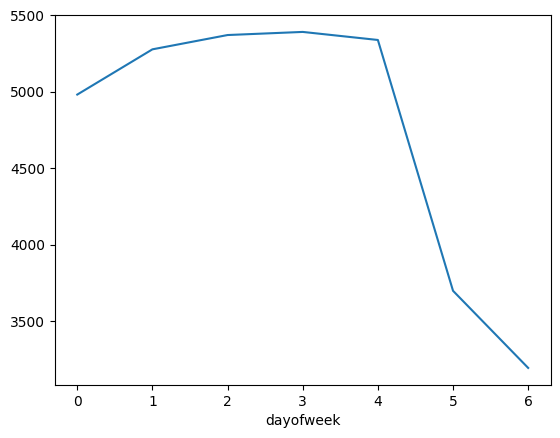

In [54]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume'].plot.line()
plt.show()

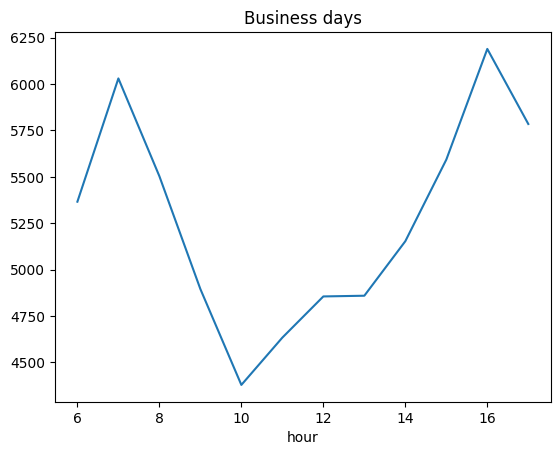

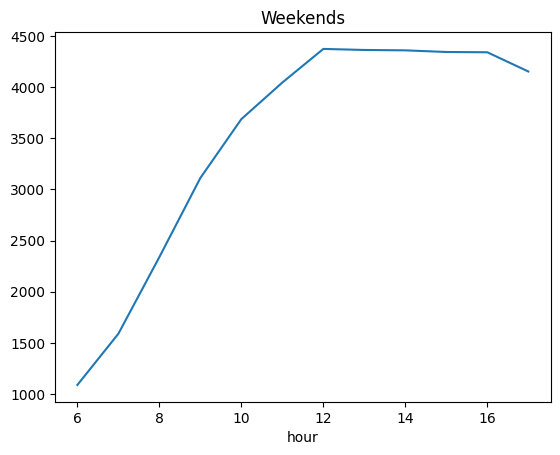

In [59]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <=4]
weekend = day.copy()[day['dayofweek']>=5]
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business days')
plt.show()

by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekends')
plt.show()